In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


In [7]:
start='2010-09-18'
end='2022-09-18'
df=pdr.get_data_yahoo('AAPL',start='2010-09-18',end='2022-09-18')
df.head()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-09-20   9.860000  10.135000   9.851786  10.115357   8.622510  658677600
2010-09-21  10.137857  10.262500  10.099643  10.134643   8.638954  668074400
2010-09-22  10.096786  10.285000  10.086071  10.276786   8.760118  585289600
2010-09-23  10.226071  10.455714  10.214286  10.318571   8.795732  786116800
2010-09-24  10.432143  10.483214  10.376786  10.440000   8.899241  649488000

In [8]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-12  159.589996  164.259995  159.300003  163.429993  163.159332   
2022-09-13  159.899994  160.539993  153.369995  153.839996  153.585220   
2022-09-14  154.789993  157.100006  153.610001  155.309998  155.052780   
2022-09-15  154.649994  155.240005  151.380005  152.369995  152.117645   
2022-09-16  151.210007  151.350006  148.369995  150.699997  150.450424   

               Volume  
Date                   
2022-09-12  104956000  
2022-09-13  122656600  
2022-09-14   87965400  
2022-09-15   90481100  
2022-09-16  162278800

In [9]:
df=df.reset_index()
df.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2010-09-20   9.860000  10.135000   9.851786  10.115357   8.622510  658677600
1 2010-09-21  10.137857  10.262500  10.099643  10.134643   8.638954  668074400
2 2010-09-22  10.096786  10.285000  10.086071  10.276786   8.760118  585289600
3 2010-09-23  10.226071  10.455714  10.214286  10.318571   8.795732  786116800
4 2010-09-24  10.432143  10.483214  10.376786  10.440000   8.899241  649488000

In [10]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

Open       High        Low      Close     Volume
0   9.860000  10.135000   9.851786  10.115357  658677600
1  10.137857  10.262500  10.099643  10.134643  668074400
2  10.096786  10.285000  10.086071  10.276786  585289600
3  10.226071  10.455714  10.214286  10.318571  786116800
4  10.432143  10.483214  10.376786  10.440000  649488000

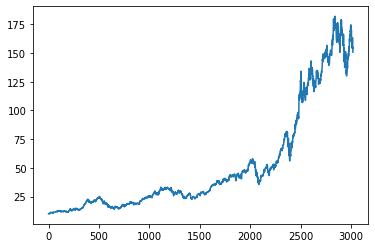

In [11]:
plt.plot(df.Close)

In [12]:
df


Open        High         Low       Close     Volume
0       9.860000   10.135000    9.851786   10.115357  658677600
1      10.137857   10.262500   10.099643   10.134643  668074400
2      10.096786   10.285000   10.086071   10.276786  585289600
3      10.226071   10.455714   10.214286   10.318571  786116800
4      10.432143   10.483214   10.376786   10.440000  649488000
...          ...         ...         ...         ...        ...
3015  159.589996  164.259995  159.300003  163.429993  104956000
3016  159.899994  160.539993  153.369995  153.839996  122656600
3017  154.789993  157.100006  153.610001  155.309998   87965400
3018  154.649994  155.240005  151.380005  152.369995   90481100
3019  151.210007  151.350006  148.369995  150.699997  162278800

[3020 rows x 5 columns]

In [13]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    152.7708
3016    152.6369
3017    152.5258
3018    152.4316
3019    152.3098
Name: Close, Length: 3020, dtype: float64

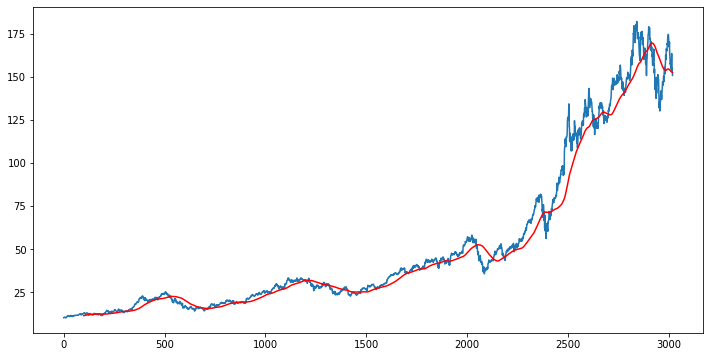

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3015    161.04555
3016    161.00505
3017    160.99755
3018    160.95820
3019    160.88520
Name: Close, Length: 3020, dtype: float64

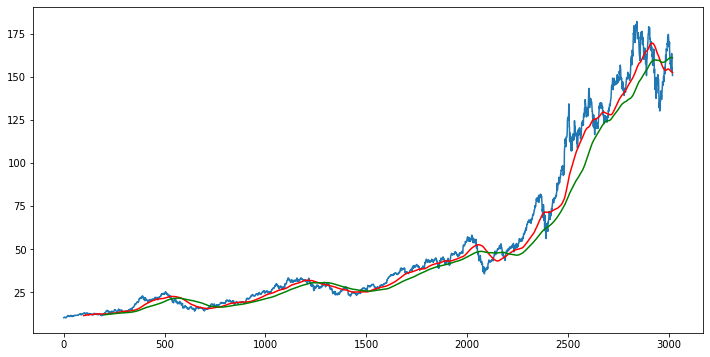

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape


(3020, 5)

In [18]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [19]:
data_training.head()

Close
0  10.115357
1  10.134643
2  10.276786
3  10.318571
4  10.440000

In [20]:
data_testing.head()

Close
2114  42.544998
2115  42.700001
2116  42.605000
2117  42.732498
2118  43.007500

In [21]:
data_training.tail()

Close
2109  43.560001
2110  42.735001
2111  42.602501
2112  42.357498
2113  42.722500

In [22]:
data_testing.tail()

Close
3015  163.429993
3016  153.839996
3017  155.309998
3018  152.369995
3019  150.699997

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00341047],
       [0.0038117 ],
       [0.00676894],
       ...,
       [0.6792956 ],
       [0.67419839],
       [0.68179214]])

In [35]:
data_training_array.shape

(2114, 1)

In [36]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train) 

In [37]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [38]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
#1 because we are working for only close column otherwise it may not be 1
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

#all above are the 4 layers and now we add dense layer to add all4 layers
#units=1 because we have to predict only one value ie closing price
model.add(Dense(units=1))

In [39]:
model.summary()
#summary of LSTM MODEL

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [40]:
#Now compile the model and optimiser will be adam
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 25s 296ms/step - loss: 0.0306
Epoch 2/50
63/63 [==============================] - 18s 280ms/step - loss: 0.0069
Epoch 3/50
63/63 [==============================] - 18s 283ms/step - loss: 0.0057
Epoch 4/50
63/63 [==============================] - 17s 275ms/step - loss: 0.0058
Epoch 5/50
63/63 [==============================] - 17s 270ms/step - loss: 0.0047
Epoch 6/50
63/63 [==============================] - 17s 273ms/step - loss: 0.0049
Epoch 7/50
63/63 [==============================] - 17s 269ms/step - loss: 0.0044
Epoch 8/50
63/63 [==============================] - 17s 272ms/step - loss: 0.0042
Epoch 9/50
63/63 [==============================] - 17s 268ms/step - loss: 0.0044
Epoch 10/50
63/63 [==============================] - 17s 271ms/step - loss: 0.0038
Epoch 11/50
63/63 [==============================] - 17s 269ms/step - loss: 0.0038
Epoch 12/50
63/63 [==============================] - 17s 267ms/step - loss: 0.0037
Epoch 13/50
6

In [41]:
model.save('keras_model.h5')

In [42]:
data_training.tail(100)

Close
2014  54.592499
2015  55.007500
2016  54.415001
2017  55.197498
2018  55.547501
...         ...
2109  43.560001
2110  42.735001
2111  42.602501
2112  42.357498
2113  42.722500

[100 rows x 1 columns]

In [43]:
#like for predicting the value of 2114 index we need value of previous 100 days
#for this we have to fetch training data to get data of previous 100 days(these 100 values must be append)

past_100_days=data_training.tail(100)

In [44]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\fabia\AppData\Local\Temp\ipykernel_2052\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [46]:
final_df.head()

Close
0  54.592499
1  55.007500
2  54.415001
3  55.197498
4  55.547501

In [47]:
#Now again i have to apply scaling down because this has not been scale down
input_data=scaler.fit_transform(final_df)
input_data


array([[0.13003328],
       [0.13286677],
       [0.12882138],
       ...,
       [0.81770079],
       [0.79762737],
       [0.78622515]])

In [48]:
input_data.shape

(1006, 1)

In [49]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [50]:
#now again convert it into numpy arrays
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [51]:
# Making Predictions

y_predicted=model.predict(x_test)

29/29 [==============================] - 4s 89ms/step


In [52]:
y_predicted.shape

(906, 1)

In [53]:
y_predicted

array([[0.14657682],
       [0.14786749],
       [0.1490412 ],
       [0.1500794 ],
       [0.1509769 ],
       [0.15174448],
       [0.15238933],
       [0.15293431],
       [0.15341124],
       [0.15384623],
       [0.1542606 ],
       [0.15465374],
       [0.15503377],
       [0.15541303],
       [0.15579611],
       [0.1561743 ],
       [0.15652215],
       [0.15682131],
       [0.15710741],
       [0.15743083],
       [0.15783136],
       [0.15834345],
       [0.15899819],
       [0.1598174 ],
       [0.16078421],
       [0.16187616],
       [0.1631185 ],
       [0.16448373],
       [0.1659055 ],
       [0.16729951],
       [0.16860822],
       [0.16979496],
       [0.17084898],
       [0.1717811 ],
       [0.1726295 ],
       [0.17343786],
       [0.17423785],
       [0.17505552],
       [0.17592733],
       [0.17686194],
       [0.17785934],
       [0.17888974],
       [0.17991595],
       [0.18090618],
       [0.1818347 ],
       [0.18271828],
       [0.18357967],
       [0.184

In [54]:
# Now i will scale it up for that i have to find from how much factor i have scale it down
scaler.scale_

array([0.00682769])

In [55]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

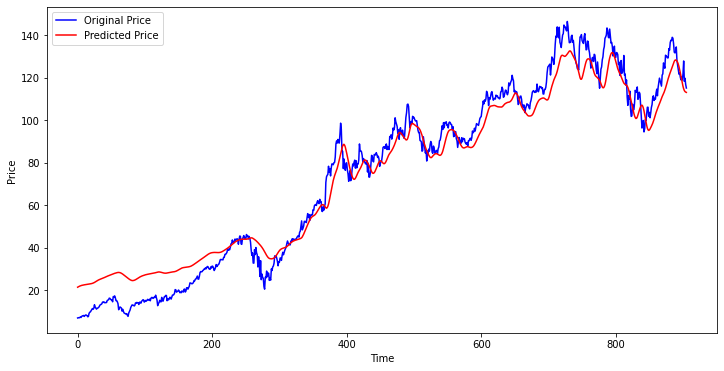

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#Streamlit Link:- http://localhost:8501
